In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [120]:
X_station_train = pd.read_csv('Data/Train/X_station_train.csv')
X_station_train['date'] = pd.to_datetime(X_station_train['date'])
X_station_train['hour'] = X_station_train['date'].dt.hour
# X_station_train['day'] = X_station_train['date'].dt.day
X_station_train['month'] = X_station_train['date'].dt.month
X_station_train["Id_h"] = X_station_train["Id"]
X_station_train["Id"] = X_station_train["Id"].str.split("_").apply(lambda s: s[:2]).str.join("_")

In [183]:
baseline_forecast_train = pd.read_csv('Data/Train/Baselines/Baseline_forecast_train.csv')
baseline_forecast_train = baseline_forecast_train.rename(columns=dict(Prediction="baseline_pred"))
baseline_observation_train = pd.read_csv('Data/Train/Baselines/Baseline_observation_train.csv')
baseline_observation_train = baseline_observation_train.rename(columns=dict(Prediction="baseline_obs"))
station_coords = pd.read_csv('Data/Other/stations_coordinates.csv')
Y_train = pd.read_csv('Data/Train/Y_train.csv')
Y_train["date"] = pd.to_datetime(Y_train['date'])

In [178]:
X_station_train.isna().sum().sum()

6899007

In [175]:
na_id = baseline_observation_train.loc[baseline_observation_train["Prediction"].isna(), "Id"]
X_station_train[X_station_train["Id"] == na_id.iloc[3]]

,number_sta,date,ff,t,td,hu,dd,precip,Id,hour,month,Id_h
405628,22247002,2016-01-01 00:00:00,0.29,275.82,NaN,NaN,54.0,0.0,22247002_0,0,1,22247002_0_0
405629,22247002,2016-01-01 01:00:00,0.61,275.23,NaN,NaN,109.0,0.0,22247002_0,1,1,22247002_0_1
405630,22247002,2016-01-01 02:00:00,1.30,275.31,NaN,NaN,120.0,0.0,22247002_0,2,1,22247002_0_2
405631,22247002,2016-01-01 03:00:00,2.71,276.09,NaN,NaN,132.0,0.0,22247002_0,3,1,22247002_0_3
405632,22247002,2016-01-01 04:00:00,2.72,276.45,NaN,NaN,135.0,0.0,22247002_0,4,1,22247002_0_4
405633,22247002,2016-01-01 05:00:00,2.80,276.55,NaN,NaN,130.0,NaN,22247002_0,5,1,22247002_0_5
405634,22247002,2016-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22247002_0,6,1,22247002_0_6
405635,22247002,2016-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22247002_0,7,1,22247002_0_7
405636,22247002,2016-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22247002_0,8,1,22247002_0_8
405637,22247002,2016-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22247002_0,9,1,22247002_0_9


In [189]:
X_station_train.isna().sum() / len(X_station_train)

number_sta    0.000000
date          0.000000
ff            0.397058
t             0.052390
td            0.323928
hu            0.323367
dd            0.397474
precip        0.070371
Id            0.000000
hour          0.000000
month         0.000000
Id_h          0.000000
dtype: float64

In [243]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
simple_imputer = SimpleImputer(strategy="median")
X_station_impute = X_station_train.copy()
print("Scaling...", end="")
X_station_impute[["ff", "t", "td", "hu", "dd", "precip"]] = scaler.fit_transform(X_station_impute[["ff", "t", "td", "hu", "dd", "precip"]])
print(" Done")

print("Imputing...", end="")
X_station_impute[["ff", "t", "td", "hu", "dd", "precip"]] = simple_imputer.fit_transform(X_station_impute[["ff", "t", "td", "hu", "dd", "precip"]])
print("Done")

Scaling... Done
Imputing...Done


In [244]:
baseline_scaler = StandardScaler()
baseline_imputer = SimpleImputer(strategy="median")
baseline_observation_impute = baseline_observation_train[["Id", "baseline_obs"]]
baseline_observation_impute[["baseline_obs"]] = baseline_scaler.fit_transform(baseline_observation_impute[["baseline_obs"]])
baseline_observation_impute[["baseline_obs"]] = baseline_imputer.fit_transform(baseline_observation_impute[["baseline_obs"]])

C:\Users\aleks\anaconda3\envs\defi-ia\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\aleks\anaconda3\envs\defi-ia\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [264]:
y_imputer = SimpleImputer(strategy="median")
y_impute = Y_train.copy()#[["Id", "number_sta", "Ground_truth", "Date"]]
y_impute[["Ground_truth"]] = y_imputer.fit_transform(y_impute[["Ground_truth"]])

In [ ]:
batch_size = 10

Y_train = Y_train.sort_values(["number_sta", "date"]).reset_index(drop=True)
X_station_train = X_station_train.sort_values(["number_sta", "date"]).reset_index(drop=True)
station_numbers = Y_train["number_sta"].unique()
count1 = 0
count2 = 0
dataset = []
for station_number in station_numbers:
    y_station = Y_train[Y_train["number_sta"] == station_number]
    n_target = len(y_station)
    if n_target < batch_size:
        continue

    X_station = X_station_train[X_station_train["number_sta"] == station_number]
    if len(y_station) != len(X_station) / 24:
        temp_y = y_station[1:]
        min_date = temp_y["date"].min() - pd.Timedelta("1d")
        temp_X = X_station[X_station["date"] >= min_date]
        if len(temp_y) == len(temp_X) / 24:
            y_station = temp_y
            X_station = temp_X
        else:
            temp_y = y_station[:-1]
            max_date = temp_y["date"].max()
            temp_X = X_station[X_station["date"] < max_date]
            if len(temp_y) == len(temp_X) / 24:
                y_station = temp_y
                X_station = temp_X
            else:
                continue
    

    if (X_station["date"].diff()[1:] != pd.Timedelta("1h")).any():
        print(station_number)

    cols = ["Id", "ff", "t", "td", "hu", "dd", "precip"]
    X = X_station.loc[X_station["hour"] == 0, ["month"] + cols]
    for h in range(1, 24):
        X = pd.merge(X, X_station.loc[X_station["hour"] == h, cols], on="Id", suffixes=["", f"_{h}"])
    X = pd.merge(X, baseline_observation_train[["Id", "baseline_obs"]], on="Id", how="left")
    # X = pd.merge(X, baseline_observation_train[["Id", "baseline_obs"]], on="Id", how="left")
    X = X.drop(columns="Id")
    # X_station["day"] = X_station["date"].dt.day
    # X = X_station[["ff", "t", "td", "hu", "dd", "precip", "hour", "day"]]
    y = y_station["Ground_truth"]
    print(X.isna().sum().sum())
    dataset.append((X, y))




    # min_date = y_station["date"].min() - pd.Timedelta("1d")
    # max_date = y_station["date"].max()
    # X_station = X_station[X_station["date"] >= min_date]
    # X_station = X_station[X_station["date"] < max_date]
    # X_station = X_station_train[X_station_train["number_sta"] == station_number]

    # X_station = np.full((), fill_value=np.nan, dtype="float32")


In [ ]:


y_impute = y_impute.sort_values(["number_sta", "date"]).reset_index(drop=True)
X_station_impute = X_station_impute.sort_values(["number_sta", "date"]).reset_index(drop=True)
station_numbers = y_impute["number_sta"].unique()

dataset = []

X_ts = np.zeros((len(station_numbers), 729, 146))
y_ts = np.zeros((len(station_numbers), 729))

for station_number in station_numbers:
    y_station = y_impute[y_impute["number_sta"] == station_number]
    n_target = len(y_station)
    if n_target < batch_size:
        continue

    X_station = X_station_impute[X_station_impute["number_sta"] == station_number]
    if len(y_station) != len(X_station) / 24:
        temp_y = y_station[1:]
        min_date = temp_y["date"].min() - pd.Timedelta("1d")
        temp_X = X_station[X_station["date"] >= min_date]
        if len(temp_y) == len(temp_X) / 24:
            y_station = temp_y
            X_station = temp_X
        else:
            temp_y = y_station[:-1]
            max_date = temp_y["date"].max()
            temp_X = X_station[X_station["date"] < max_date]
            if len(temp_y) == len(temp_X) / 24:
                y_station = temp_y
                X_station = temp_X
            else:
                continue
    

    if (X_station["date"].diff()[1:] != pd.Timedelta("1h")).any():
        print(station_number)

    cols = ["Id", "ff", "t", "td", "hu", "dd", "precip"]
    X = X_station.loc[X_station["hour"] == 0, ["month"] + cols]
    for h in range(1, 24):
        X = pd.merge(X, X_station.loc[X_station["hour"] == h, cols], on="Id", suffixes=["", f"_{h}"])
    X = pd.merge(X, baseline_observation_impute[["Id", "baseline_obs"]], on="Id", how="left")
    # X = pd.merge(X, baseline_observation_train[["Id", "baseline_obs"]], on="Id", how="left")
    X = X.drop(columns="Id").iloc[:-1]
    # X_station["day"] = X_station["date"].dt.day
    # X = X_station[["ff", "t", "td", "hu", "dd", "precip", "hour", "day"]]
    y = y_station["Ground_truth"].iloc[:-1]
    print(X.isna().sum().sum(), y.isna().sum())
    dataset.append((X, y))




    # min_date = y_station["date"].min() - pd.Timedelta("1d")
    # max_date = y_station["date"].max()
    # X_station = X_station[X_station["date"] >= min_date]
    # X_station = X_station[X_station["date"] < max_date]
    # X_station = X_station_train[X_station_train["number_sta"] == station_number]

    # X_station = np.full((), fill_value=np.nan, dtype="float32")


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [ ]:
y_impute = y_impute.sort_values(["number_sta", "date"]).reset_index(drop=True)
X_station_impute = X_station_impute.sort_values(["number_sta", "date"]).reset_index(drop=True)
station_numbers = y_impute["number_sta"].unique()

X_ts = np.zeros((len(station_numbers), 24, 6))
y_ts = np.zeros((len(station_numbers),))

for i, station_number in enumerate(station_numbers):
    y_station = y_impute[y_impute["number_sta"] == station_number]
    n_target = len(y_station)
    if n_target < batch_size:
        continue

    X_station = X_station_impute[X_station_impute["number_sta"] == station_number]

    if (X_station["date"].diff()[1:] != pd.Timedelta("1h")).any():
        print(station_number)

    cols = ["ff", "t", "td", "hu", "dd", "precip"]

    for h in range(24):
        X_ts[i, h] = X_station.loc[X_station["hour"] == h, cols]
    y_ts[i,0] = y_station["Ground_truth"]
    y = y_station["Ground_truth"].iloc[:-1]
    print(X.isna().sum().sum(), y.isna().sum())
    dataset.append((X, y))




    # min_date = y_station["date"].min() - pd.Timedelta("1d")
    # max_date = y_station["date"].max()
    # X_station = X_station[X_station["date"] >= min_date]
    # X_station = X_station[X_station["date"] < max_date]
    # X_station = X_station_train[X_station_train["number_sta"] == station_number]

    # X_station = np.full((), fill_value=np.nan, dtype="float32")


In [289]:
X, y = dataset[0]


In [283]:
train_size = int(len(dataset)*.8)

197.60000000000002

In [268]:
from tensorflow.keras.utils import timeseries_dataset_from_array

ts_train = timeseries_dataset_from_array(
    X[:train_size], y[train_size],
    sequence_length=14
)

ts_test = timeseries_dataset_from_array(
    X[train_size], y[train_size],
    sequence_length=14
)

# RNN Model

In [279]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input

rnn_in = Input(shape=(14, 146))
x = SimpleRNN(32, activation="tanh")(rnn_in)
rnn_out = Dense(1, activation="linear")(x)

model = Model(rnn_in, rnn_out)

In [280]:
model.compile(
    optimizer="rmsprop",
    loss="mean_squared_logarithmic_error"
)

In [281]:
history = model.fit(ts, epochs=100, validation_split=.2)    

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>]

In [277]:
{"a":1}.items()

dict_items([('a', 1)])

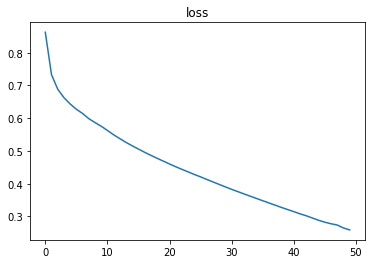

In [278]:
def plot_history(history):
    for key, val in history.history.items():
        plt.plot(val)
        plt.title(key)
        plt.show()

plot_history(history)

In [295]:
y_impute.iloc[:30]

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-03,14066001,11.7,14066001_1
2,2016-01-04,14066001,0.6,14066001_2
3,2016-01-05,14066001,0.4,14066001_3
4,2016-01-06,14066001,3.0,14066001_4
5,2016-01-07,14066001,7.0,14066001_5
6,2016-01-08,14066001,0.0,14066001_6
7,2016-01-09,14066001,9.5,14066001_7
8,2016-01-10,14066001,1.0,14066001_8
9,2016-01-11,14066001,6.0,14066001_9


In [293]:
import tensorflow as tf

for (bx, by) in ts:
    print(by[0])
    # print(tf.math.is_nan(bx).any())
    # print(model.predict(bx))

tf.Tensor(3.4, shape=(), dtype=float64)
tf.Tensor(1.4, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(4.9, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)
